# ML-Agents Open a UnityEnvironment
<img src="https://github.com/Unity-Technologies/ml-agents/blob/release_19_docs/docs/images/image-banner.png?raw=true" align="middle" width="435"/>

## Setup

In [1]:
!conda env list

# conda environments:
#
base                     C:\ProgramData\Anaconda3
ML-Agents-Config-Manager     C:\Users\marke\.conda\envs\ML-Agents-Config-Manager
ml-agents             *  C:\Users\marke\.conda\envs\ml-agents



In [2]:
!conda list

# packages in environment at C:\Users\marke\.conda\envs\ml-agents:
#
# Name                    Version                   Build  Channel
absl-py                   1.2.0                    pypi_0    pypi
anyio                     3.6.1                    pypi_0    pypi
argon2-cffi               21.3.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
attrs                     22.1.0                   pypi_0    pypi
babel                     2.10.3                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
beautifulsoup4            4.11.1                   pypi_0    pypi
blas                      1.0                         mkl  
bleach                    5.0.1                    pypi_0    pypi
brotlipy                  0.7.0           py37h2bbff1b_1003  
ca-certificates           2022.07.19           haa95532_0  
cachetools                5.2.0                    pypi_0    pypi
cattrs                

### Start Environment from the registry or build

In [3]:
try:
    env.close()
except:
    pass

#env_id = "GridWorld" #['Basic', '3DBall', '3DBallHard', 'GridWorld', 'Hallway', 'VisualHallway', 'CrawlerDynamicTarget', 'CrawlerStaticTarget', 'Bouncer', 'SoccerTwos', 'PushBlock', 'VisualPushBlock', 'WallJump', 'Tennis', 'Reacher', 'Pyramids', 'VisualPyramids', 'Walker', 'FoodCollector', 'VisualFoodCollector', 'StrikersVsGoalie', 'WormStaticTarget', 'WormDynamicTarget']

#from mlagents_envs.registry import default_registry
from mlagents_envs.environment import UnityEnvironment
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

%matplotlib inline

env = UnityEnvironment(file_name="../Builds/RoboDriver/RoboDriverUnityProject") # careful, reverse slashes
#env = default_registry[env_id].make()

### Reset the environment
To reset the environment, simply call `env.reset()`. This method takes no argument and returns nothing but will send a signal to the simulation to reset.

In [4]:
env.reset()

### Behavior Specs


#### Get the Behavior Specs from the Environment

In [5]:
# We will only consider the first Behavior
behavior_name = list(env.behavior_specs)[0]
print(f"Name of the behavior : {behavior_name}")
spec = env.behavior_specs[behavior_name]

Name of the behavior : VisualFoodCollector?team=0


#### Get the Observation Space from the Behavior Specs

In [6]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Number of observations :  2
Is there a visual observation ? True


#### Get the Action Space from the Behavior Specs

In [7]:
# Is the Action continuous or multi-discrete ?
if spec.action_spec.continuous_size > 0:
    print(f"There are {spec.action_spec.continuous_size} continuous actions")
if spec.action_spec.is_discrete():
    print(f"There are {spec.action_spec.discrete_size} discrete actions")


# How many actions are possible ?
#print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.action_spec.discrete_size > 0:
    for action, branch_size in enumerate(spec.action_spec.discrete_branches):
        print(f"Action number {action} has {branch_size} different options")



There are 3 continuous actions
Action number 0 has 2 different options


### Stepping the environment

#### Get the steps from the Environment
You can do this with the `env.get_steps(behavior_name)` method. If there are multiple behaviors in the Environment, you can call this method with each of the behavior's names.
_Note_ This will not move the simulation forward.

In [8]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

#### Set actions for each behavior
You can set the actions for the Agents of a Behavior by calling `env.set_actions()` you will need to specify the behavior name and pass a tensor of dimension 2. The first dimension of the action must be equal to the number of Agents that requested a decision during the step.

In [9]:
env.set_actions(behavior_name, spec.action_spec.empty_action(len(decision_steps)))

#### Move the simulation forward
Call `env.step()` to move the simulation forward. The simulation will progress until an Agent requestes a decision or terminates.

In [10]:
env.step()

### Observations

#### Show the observations for one of the Agents
`DecisionSteps.obs` is a tuple containing all of the observations for all of the Agents with the provided Behavior name.
Each value in the tuple is an observation tensor containing the observation data for all of the agents.

Here is the first visual observation


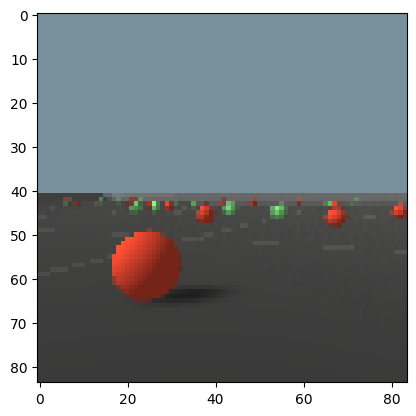

First vector observations :  [0.]


In [11]:
for index, obs_spec in enumerate(spec.observation_specs):
    if len(obs_spec.shape) == 3:
        print("Here is the first visual observation")
        plt.imshow(decision_steps.obs[index][0,:,:,:])
        plt.show()

for index, obs_spec in enumerate(spec.observation_specs):
    if len(obs_spec.shape) == 1:
        print("First vector observations : ", decision_steps.obs[index][0,:])

### Run the Environment for a few episodes

Here is the first visual observation


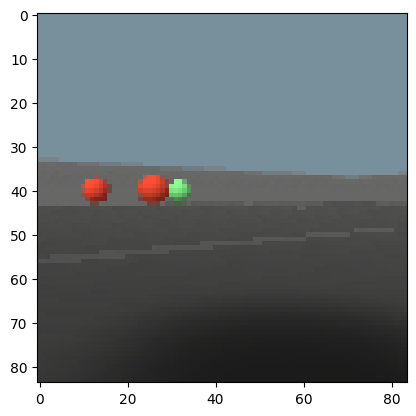

First vector observations :  [0.]
Actions: [[-0.20399448  0.5398292  -0.52510685]], [[0]]
Total rewards for episode 0 is 0.0
---------------------------------------------------------


KeyboardInterrupt: 

In [12]:
for episode in range(1):
    env.reset()
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    tracked_agent = -1 # -1 indicates not yet tracking
    done = False # For the tracked_agent
    episode_rewards = 0 # For the tracked_agent
    while not done:
        # Track the first agent we see if not tracking
        # Note : len(decision_steps) = [number of agents that requested a decision]
        if tracked_agent == -1 and len(decision_steps) >= 1:
            tracked_agent = decision_steps.agent_id[0]
    
        for index, obs_spec in enumerate(spec.observation_specs):
            if len(obs_spec.shape) == 3:
                print("Here is the first visual observation")
                plt.imshow(decision_steps.obs[index][0,:,:,:])
                plt.show()

        for index, obs_spec in enumerate(spec.observation_specs):
            if len(obs_spec.shape) == 1:
                print("First vector observations : ", decision_steps.obs[index][0,:])
                
        # Generate an action for all agents
        action = spec.action_spec.random_action(len(decision_steps))
        #action = spec.action_spec.empty_action.
        
        print(f"Actions: {action.continuous}, {action.discrete}")
        
        # Set the actions
        env.set_actions(behavior_name, action)

        # Move the simulation forward
        env.step()

        # Get the new simulation results
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        if tracked_agent in decision_steps: # The agent requested a decision
            episode_rewards += decision_steps[tracked_agent].reward
        if tracked_agent in terminal_steps: # The agent terminated its episode
            episode_rewards += terminal_steps[tracked_agent].reward
            done = True
            
        print(f"Total rewards for episode {episode} is {episode_rewards}")
        print("---------------------------------------------------------")
        
        time.sleep(1)
        clear_output()


### Close the Environment to free the port it is using

In [ ]:
env.close()
print("Closed environment")